In [4]:
import math
import numpy as np

def f(x):
   return 2 * pow(x, 4) - 8 * pow(x, 3) - 16 * pow(x, 2) - 1

eps=0.0001

#Функція відокремлення коренів
def find_segments():
    search_range = np.arange(-10, 10, 1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Знайдені відрізки: [{a}, {b}]')

Знайдені відрізки: [-2, -1]
Знайдені відрізки: [5, 6]


In [61]:
import math
import numpy as np
from scipy.misc import derivative
from scipy.optimize import root_scalar

#Функція
def func(x):
   return 2 * pow(x, 4) - 8 * pow(x, 3) - 16 * pow(x, 2) - 1

eps=0.0001

#Метод половинного ділення
def rec(a, b, eps):
    while(abs(a-b) > eps):
        if func(a) * func((a+b) / 2) < 0:
            b = (a+b) / 2
        else:
            a = (a+b) / 2

        x = (a+b) / 2
    print('x= ', round(x,5), " - Метод половинного ділення")

#Метод хорд
def hord (a,b,eps):
    if(func(a) * derivative(func, a, n = 2) > 0):
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a

    xi_1 = xi-(xi-x0) * func(xi) / (func(xi) - func(x0))

    while (abs(xi_1-xi) > eps):
        xi = xi_1
        xi_1 = xi - (xi-x0) * func(xi) / (func(xi) - func(x0))

    print('x= ', round (xi_1,5), " - Метод хорд:")

a = -2
b = -1

print("Перший відрізок")
rec(a,b,eps)
hord(a,b,eps)

print("Другий відрізок")
rec(5,6,eps)
hord(5,6,eps)




Перший відрізок
x=  -1.49619  - Метод половинного ділення
x=  -1.49614  - Метод хорд:
Другий відрізок
x=  5.46652  - Метод половинного ділення
x=  5.4665  - Метод хорд:


<ipython-input-61-ff5acb9bd019>:25: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  if(func(a) * derivative(func, a, n = 2) > 0):


x_i =  [-2 -1  0  3]
f(x_i) =  [-4  3  2 11]
Точки =  [-1.5, -0.5, 1, 2]
Значення функції у точках =  [0.875, 3.125, -1.0, 0.0]


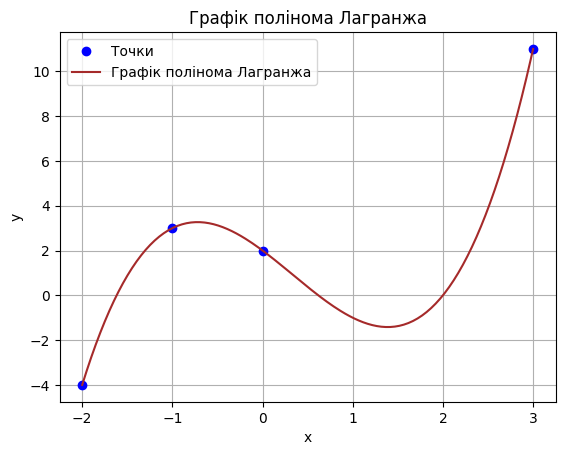

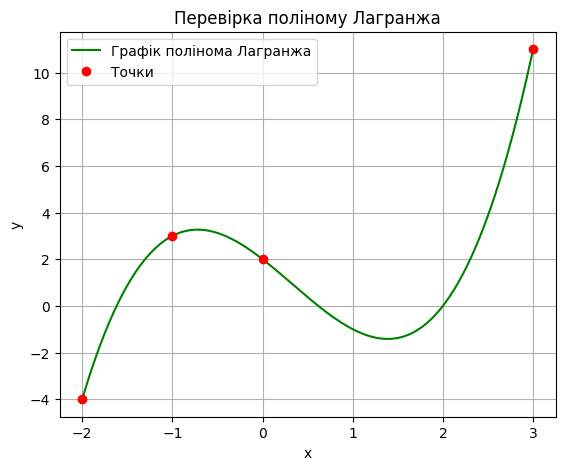

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x_i = np.array([-2, -1, 0, 3])
fx_i = np.array([-4, 3, 2, 11])
print("x_i = ", x_i)
print("f(x_i) = ", fx_i)

dots = [-1.5, -0.5, 1, 2]
print("Точки = ", dots)

def interpolation_Lagrange_polynomial(x_i, fx_i, dot1):
  L_i = []
  for i in range(len(x_i)):
    P_i = 1
    for j in range(len(x_i)):
      if i != j:
        P_i *= (dot1 - x_i[j])/(x_i[i] - x_i[j])
    L_i.append(P_i)
  return np.dot(fx_i, L_i)

function_interpolation = []
for i in dots:
  function_interpolation.append(interpolation_Lagrange_polynomial(x_i, fx_i, i).round(3))
print("Значення функції у точках = ", function_interpolation)

x_i_new = np.linspace(np.min(x_i),np.max(x_i),200)

fx_i_new = []
for i in x_i_new:
  fx_i_new.append(interpolation_Lagrange_polynomial(x_i,fx_i,i))

plt.plot(x_i, fx_i, 'o', color = 'blue', label = 'Точки')
plt.plot(x_i_new, fx_i_new, color = 'brown', label = 'Графік полінома Лагранжа')
plt.title('Графік полінома Лагранжа')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

verif_function = lagrange(x_i, fx_i)
figure = plt.figure(figsize = (6.4, 5))
plt.plot(x_i_new, verif_function(x_i_new), color = 'g', label = 'Графік полінома Лагранжа')
plt.plot(x_i, fx_i, 'ro', label = 'Точки', markersize = 6)
plt.title('Перевірка поліному Лагранжа')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Відрізок 1:
S_0(x) = 2.65 + 1.0177(x - 0.1) + 0.0(x - 0.1)^2 + -12.9435(x - 0.1)^3, x належить [0.1, 0.3]
Відрізок 2:
S_1(x) = 2.75 + -0.5355(x - 0.3) + -7.7661(x - 0.3)^2 + 11.096(x - 0.3)^3, x належить [0.3, 0.6]
Відрізок 3:
S_2(x) = 2.19 + -2.1992(x - 0.6) + 2.2203(x - 0.6)^2 + 0.9162(x - 0.6)^3, x належить [0.6, 1.1]
Відрізок 4:
S_3(x) = 1.76 + 0.7082(x - 1.1) + 3.5946(x - 1.1)^2 + -1.7117(x - 1.1)^3, x належить [1.1, 1.8]
Значення сплайна:
x = 0.10, y = 2.650
x = 0.12, y = 2.686
x = 0.13, y = 2.717
x = 0.15, y = 2.741
x = 0.17, y = 2.760
x = 0.19, y = 2.774
x = 0.20, y = 2.783
x = 0.22, y = 2.787
x = 0.24, y = 2.786
x = 0.25, y = 2.781
x = 0.27, y = 2.772
x = 0.29, y = 2.760
x = 0.31, y = 2.744
x = 0.32, y = 2.725
x = 0.34, y = 2.703
x = 0.36, y = 2.678
x = 0.37, y = 2.651
x = 0.39, y = 2.621
x = 0.41, y = 2.590
x = 0.43, y = 2.557
x = 0.44, y = 2.523
x = 0.46, y = 2.487
x = 0.48, y = 2.451
x = 0.49, y = 2.414
x = 0.51, y = 2.377
x = 0.53, y = 2.339
x = 0.55, y = 2.302
x = 0.56, y

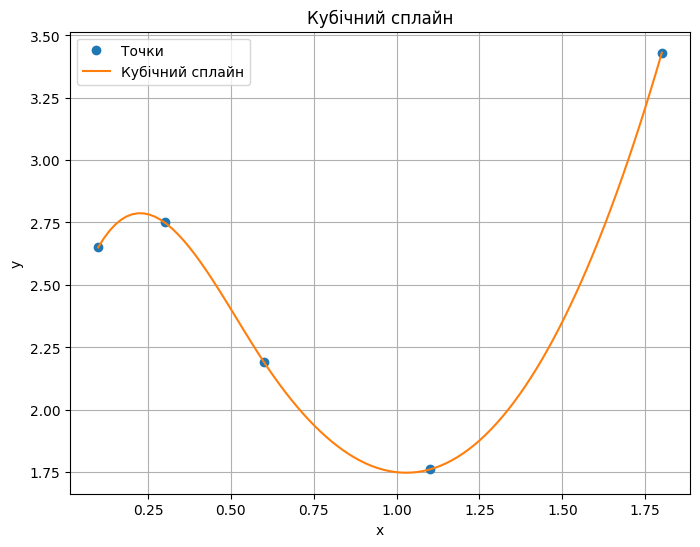

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = np.array([0.1, 0.3, 0.6, 1.1, 1.8, 0])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43, 0])

n = len(x) - 1
h = np.diff(x)

a = y
b = np.zeros(n)
c = np.zeros(n)
d = np.zeros(n)

alpha = np.zeros(n)

for i in range(1, n):
 alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
 l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
 mu[i] = h[i] / l[i]
 z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

for j in range(n - 2, -1, -1):
  c[j] = z[j] - mu[j] * c[j+1]
  b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
  d[j] = (c[j+1] - c[j]) / (3 * h[j])

for i in range(n-1):
 print(f"Відрізок {i+1}:")
 print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

x = np.array([0.1, 0.3, 0.6, 1.1, 1.8])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43])
cs = CubicSpline(x, y)

x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

print("Значення сплайна:")
for i in range(len(x_new)):
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()

Наші данні.
i =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X =  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Y =  [1.18006658 1.32106099 1.42533561 1.49670671 1.54030231 1.56235775
 1.56996714 1.57080048 1.57279791 1.58385316]
Аналітичні розрахунки
x_ =  0.55
x_2 =  0.385
y_ =  1.4823248645804508
y_x =  0.8471056690834763
a1 =  0.3857817401724651
a0 =  1.2701449074855948
a0 = 0.39, a1 = 1.27


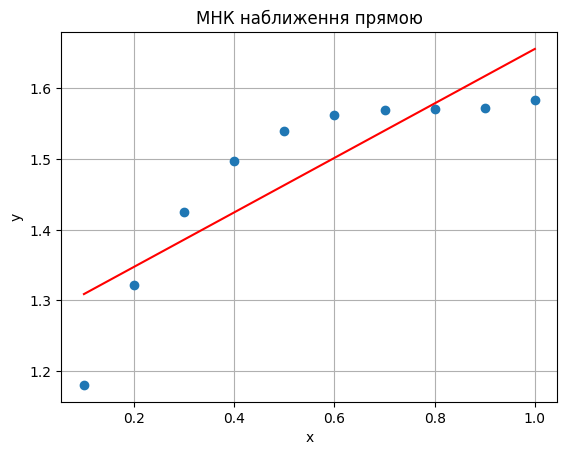

a0 = 1.08, a1 = 1.32, a2 = -0.85


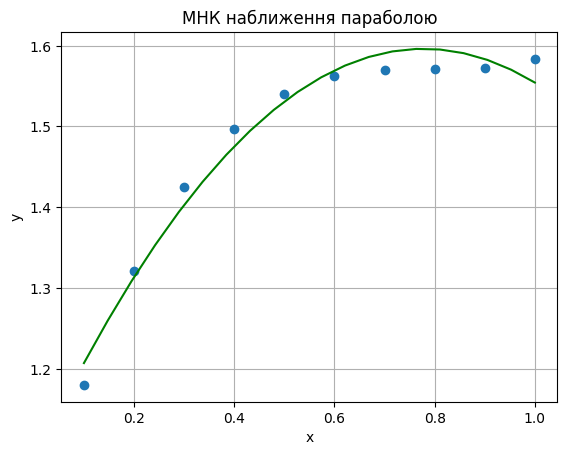

In [20]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

def function_e(x):
  return np.cos(2*x) + 2 * x

x = np.arange(0.1, 1.1, 0.1)
y = np.ones(len(x))

count = 0
count_list = []
for i in x:
  y[count] = function_e(i)
  count_list.append(count)
  count += 1

print("Наші данні.")
print("i = ", count_list)
print("X = ", x)
print("Y = ", y)

def a_1(yx, x, x2, y):
  return (yx - x * y)/(x2 - x**2)

def a_0(y, a1, x):
  return y - a1 * x

sum_x = np.sum(x)
sum_x2 = np.sum(x**2)
sum_y = np.sum(y)
sum_y_x = np.sum(y * x)

x_ = sum_x / len(x)
x_2 = sum_x2 / len(x)
y_ = sum_y / len(y)
y_x = sum_y_x / len(x)

print("Аналітичні розрахунки")
print("x_ = ", x_)
print("x_2 = ", x_2)
print("y_ = ", y_)
print("y_x = ", y_x)

a1 = a_1(y_x, x_, x_2, y_)
print("a1 = ", a1)
print("a0 = ", a_0(y_, a1, x_))

def function_prim(a, x, y):
 return np.polyval(a, x) - y

a0 = np.array([1, 1])
res_lsq = least_squares(function_prim, x0=a0, args=(x, y))
print(f"a0 = {res_lsq.x[0].round(2)}, a1 = {res_lsq.x[1].round(2)}")

x_p = np.linspace(min(x), max(x), 20)
y_p = np.polyval(res_lsq.x, x_p)
plt.plot(x, y, 'o')
plt.plot(x_p, y_p, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title("МНК наближення прямою")
plt.grid(True)
plt.show()



def function_parab(a, x, y):
 return a[0] + a[1] * x + a[2] * x**2 - y

a0 = np.array([1, 1, 1])
res_lsq = least_squares(function_parab,x0 = a0, args = (x, y))
print(f"a0 = {res_lsq.x[0].round(2)}, a1 = {res_lsq.x[1].round(2)}, a2 = {res_lsq.x[2].round(2)}")

f = lambda x: sum([u * v for u, v in zip(res_lsq.x, [1, x, x**2])])
x_p = np.linspace(min(x), max(x), 20)
y_p = f(x_p)
plt.plot(x,y, 'o')
plt.plot(x_p, y_p, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("МНК наближення параболою")
plt.grid(True)
plt.show()

In [57]:
from scipy import integrate
import numpy as np

eps = 0.0001
a = 0.8
b = 1.4
n = 10

def integral(x):
  return 1 / np.sqrt(2 * x + 3)

def left_rectangle(integral,a,b,n):
  h = (b - a) / n
  sum = 0

  for i in range(0, n):
    sum += integral(a + i * h)

  return sum * h

left = left_rectangle(integral, a, b, n).round(3)

if abs(left_rectangle(integral, a, b, n*2) - left_rectangle(integral, a, b, n)) / 3 >= eps:
  print("Лівий прямокутник:", left)

def right_rectangle(integral, a, b, n):
  h = (b - a) / n
  sum = 0

  for i in range(1, n + 1):
    sum += integral(a + i * h)

  return sum * h
right = right_rectangle(integral, a, b, n).round(3)
print("Правий прямокутник:", right)

def middle_rectangle(integral, a, b, n):
  h = (b - a) / n
  sum = 0

  for i in range(n):
    sum += integral(a + h * (i + 0.5))

  return sum * h

print("Середній прямокутник:", middle_rectangle(integral, a, b, n).round(3))

v,err = integrate.quad(integral, a, b)
print("Перевірка до методу прямокутників:", round(v, 3))

Лівий прямокутник: 0.265
Правий прямокутник: 0.262
Середній прямокутник: 0.264
Перевірка до методу прямокутників: 0.264


In [60]:
from scipy import integrate
import numpy as np

eps = 0.0001
a = 0.4
b = 1.2
n = 8

def integral(x):
    return np.sqrt(x) * np.cos(x**2)

def simpson_method(func, a, b, n):
    h = (b - a) / n
    integral = func(a) + func(b)

    for i in range(1,n):
        k = a + i * h

        if i % 2 == 0:
            integral += 2 * func(k)
        else:
            integral += 4 * func(k)

    integral *= h / 3

    return integral

integral_1 = simpson_method(integral, a, b, n)
integral_2 = simpson_method(integral, a, b, n * 2)

while abs(integral_2 - integral_1) / 15 > eps:
    n *= 2
    integral_2 = simpson_method(integral, a, b, n)

print("Метод Сімпсона:", round(integral_2, 3))

v,err = integrate.quad(integral,a,b)
print("Перевірка методу Сімпсона:",round(v, 3))

Метод Сімпсона: 0.484
Перевірка методу Сімпсона: 0.484


In [59]:
from scipy import integrate
import numpy as np

def integral(x):
    return 1 / np.sqrt(3 * x**2 - 0.4)

eps = 0.0001
a = 1.3
b = 2.1
n = 20

def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    x = a
    sum = 0

    for i in range(1, n):
        x += h
        sum += 2 * func(x)

    sum += func(b)
    integral = h / 2 * sum

    return integral


integral_1 = trapezoidal_rule(integral, a, b, n)
integral_2 = trapezoidal_rule(integral, a, b, n * 2)

while abs(integral_2 - integral_1) / n > eps:
    integral_1 = integral_2
    n *= 2
    integral_2 = trapezoidal_rule(integral, a, b, n)


print("Метод Трапеції:", round(integral_2, 3))

v,err = integrate.quad(integral, a, b)
print("Перевірка методу Трапецій: ",round(v, 3))

Метод Трапеції: 0.28
Перевірка методу Трапецій:  0.284
